In [1]:
# Imports sklearn libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score, max_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import KFold

# Imports python libraries
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# Loading specific dataset

This code snippet was created in case a user wants to load data from one specific CSV file. Used for test purposes.

In [2]:
# load the data
train_data = pd.read_csv('../CHEMBL239_dataset_train.csv')
test_data = pd.read_csv('../CHEMBL239_dataset_test.csv')

# Get x and y values
y_train = train_data.loc[:, 'exp_mean']
y_test = test_data.loc[:, 'exp_mean']
X_train = train_data.loc[:, 'Bit 1' : 'Bit 1024']
X_test = test_data.loc[:, 'Bit 1' : 'Bit 1024']

training_dataset = X_train, y_train
testing_dataset = X_test, y_test

# Loading ALL dataset

This code snippet loads all data used for this specific Bachelor End Project.

  0%|          | 0/4 [00:00<?, ?it/s]

239
CATS
knn
The best value for the n_neighbors parameter in the KNN model is: 6
rf
The best value for the n_estimator parameter in the RF model is: 500
svr
The best value for the kernel parameter in the SVR model is: rbf
CDKmolprop
knn
The best value for the n_neighbors parameter in the KNN model is: 9
rf
The best value for the n_estimator parameter in the RF model is: 100
svr
The best value for the kernel parameter in the SVR model is: sigmoid
constitutional
knn
The best value for the n_neighbors parameter in the KNN model is: 7
rf
The best value for the n_estimator parameter in the RF model is: 50
svr
The best value for the kernel parameter in the SVR model is: rbf
WHIM
knn
The best value for the n_neighbors parameter in the KNN model is: 9
rf
The best value for the n_estimator parameter in the RF model is: 50
svr
The best value for the kernel parameter in the SVR model is: poly
Druglike
knn
The best value for the n_neighbors parameter in the KNN model is: 8
rf
The best value for th

 25%|██▌       | 1/4 [00:27<01:21, 27.21s/it]

4005
CATS
knn
The best value for the n_neighbors parameter in the KNN model is: 9
rf
The best value for the n_estimator parameter in the RF model is: 50
svr
The best value for the kernel parameter in the SVR model is: poly


<ipython-input-5-4e917a25c854>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 3,  figsize=(20, 5))


CDKmolprop
knn
The best value for the n_neighbors parameter in the KNN model is: 9
rf
The best value for the n_estimator parameter in the RF model is: 1000
svr
The best value for the kernel parameter in the SVR model is: rbf
constitutional
knn
The best value for the n_neighbors parameter in the KNN model is: 9
rf
The best value for the n_estimator parameter in the RF model is: 50
svr
The best value for the kernel parameter in the SVR model is: linear
WHIM
knn
The best value for the n_neighbors parameter in the KNN model is: 9
rf
The best value for the n_estimator parameter in the RF model is: 1000
svr
The best value for the kernel parameter in the SVR model is: rbf
Druglike
knn
The best value for the n_neighbors parameter in the KNN model is: 8
rf
The best value for the n_estimator parameter in the RF model is: 100
svr
The best value for the kernel parameter in the SVR model is: linear
MorganFP
knn
The best value for the n_neighbors parameter in the KNN model is: 6
rf
The best value fo

 50%|█████     | 2/4 [01:19<01:09, 34.75s/it]

224
CATS
knn
The best value for the n_neighbors parameter in the KNN model is: 9
rf
The best value for the n_estimator parameter in the RF model is: 50
svr
The best value for the kernel parameter in the SVR model is: rbf
CDKmolprop
knn
The best value for the n_neighbors parameter in the KNN model is: 9
rf
The best value for the n_estimator parameter in the RF model is: 500
svr
The best value for the kernel parameter in the SVR model is: rbf
constitutional
knn
The best value for the n_neighbors parameter in the KNN model is: 9
rf
The best value for the n_estimator parameter in the RF model is: 500
svr
The best value for the kernel parameter in the SVR model is: rbf
WHIM
knn
The best value for the n_neighbors parameter in the KNN model is: 9
rf
The best value for the n_estimator parameter in the RF model is: 1000
svr
The best value for the kernel parameter in the SVR model is: rbf
Druglike
knn
The best value for the n_neighbors parameter in the KNN model is: 9
rf
The best value for the n

 75%|███████▌  | 3/4 [03:01<01:00, 60.64s/it]


244
CATS
knn


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

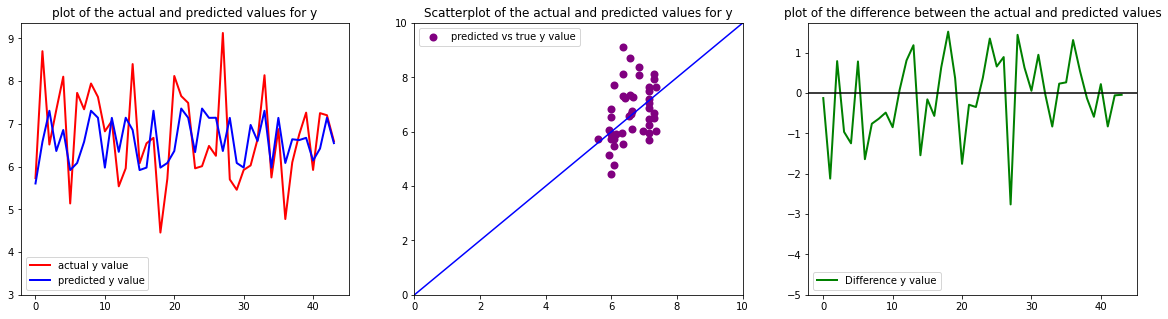

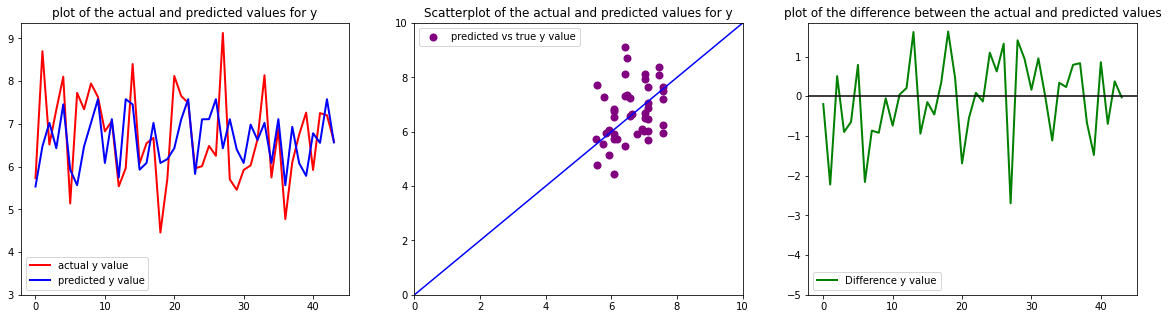

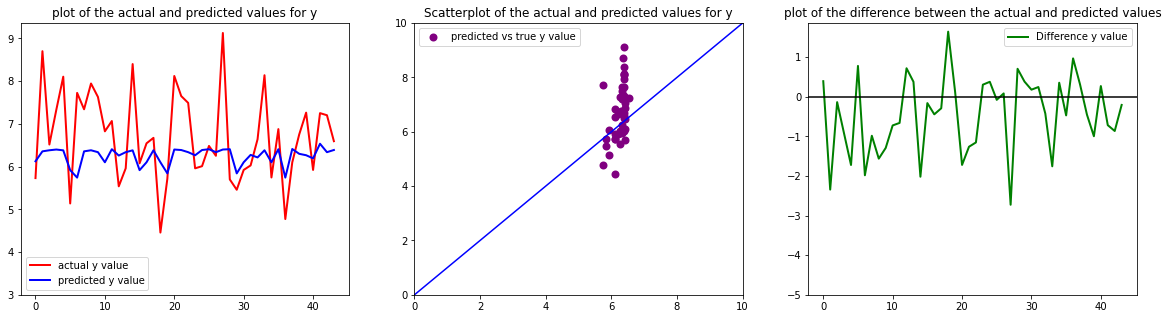

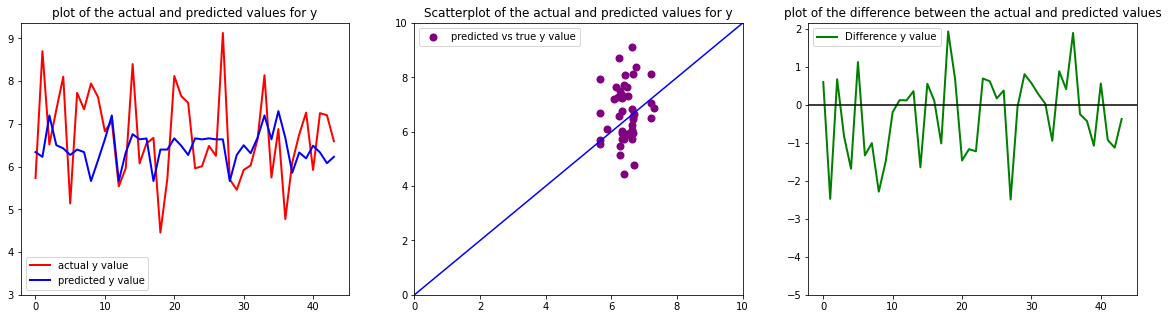

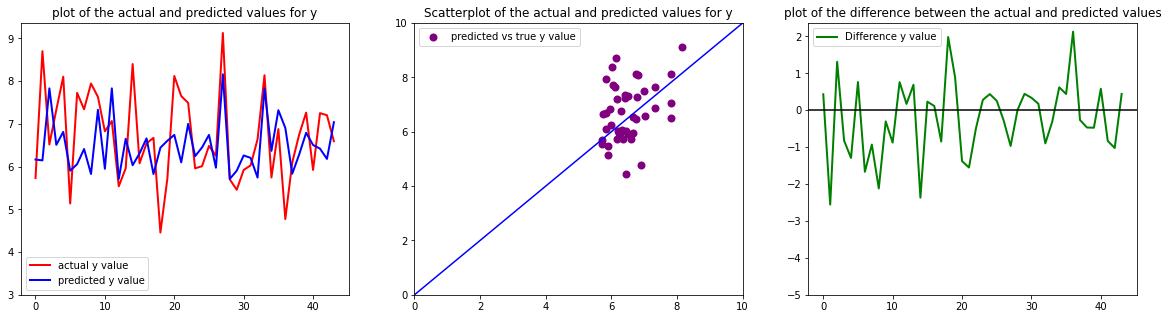

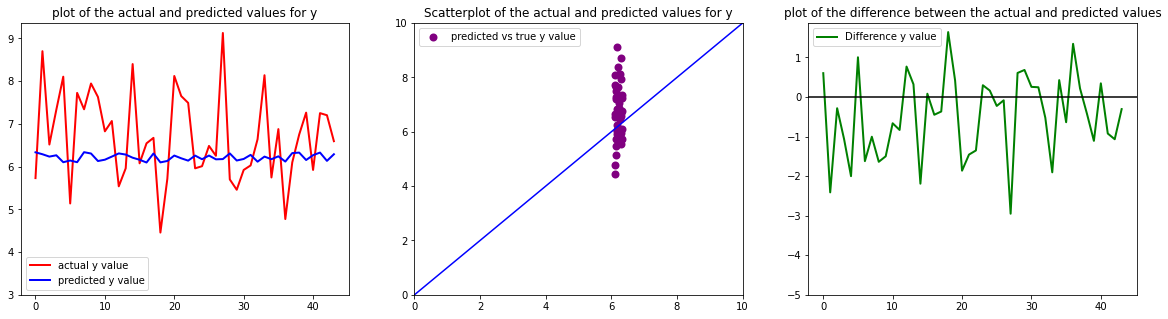

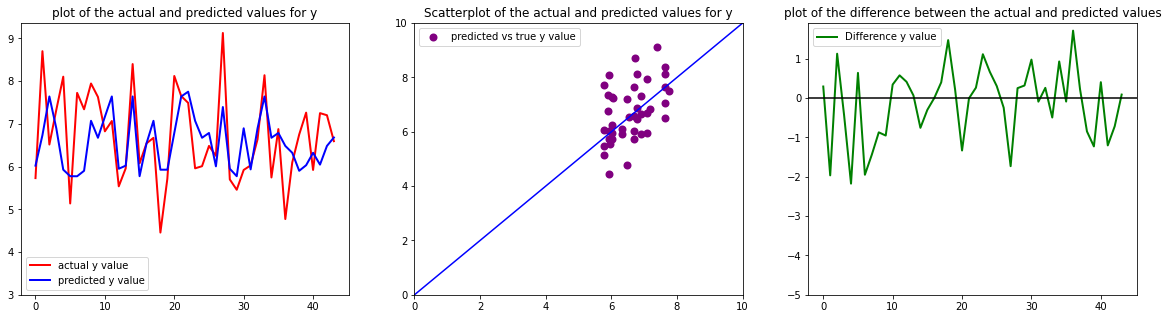

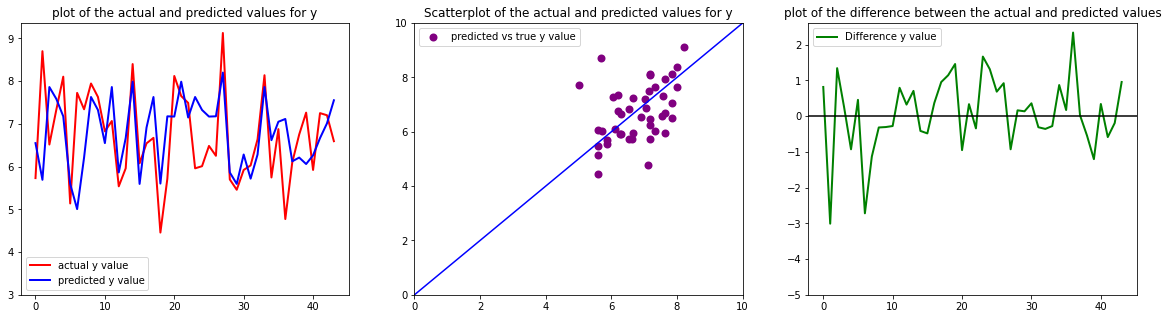

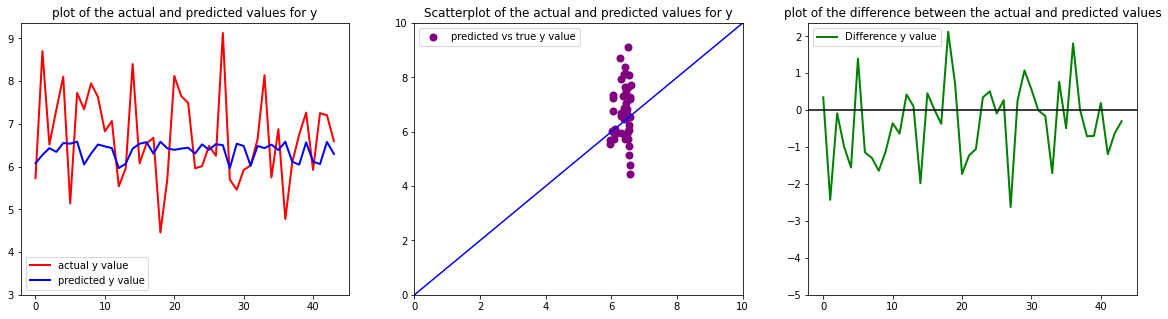

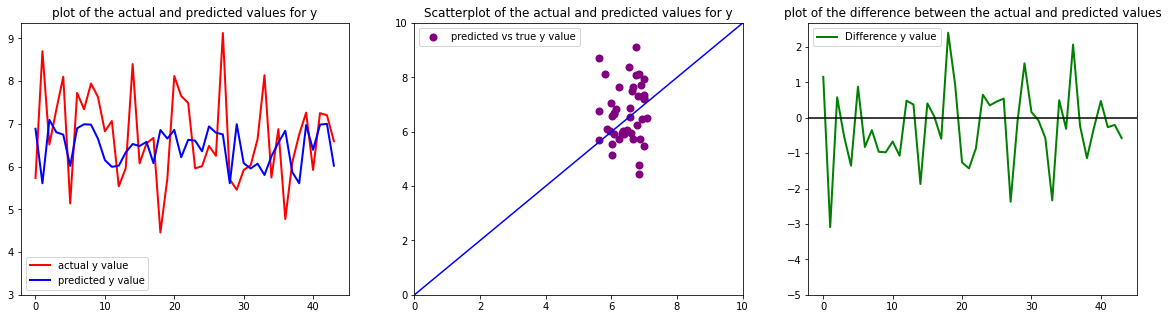

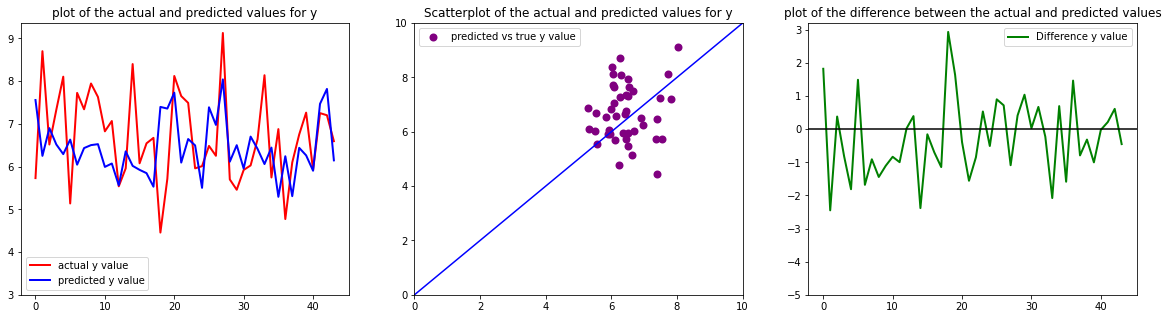

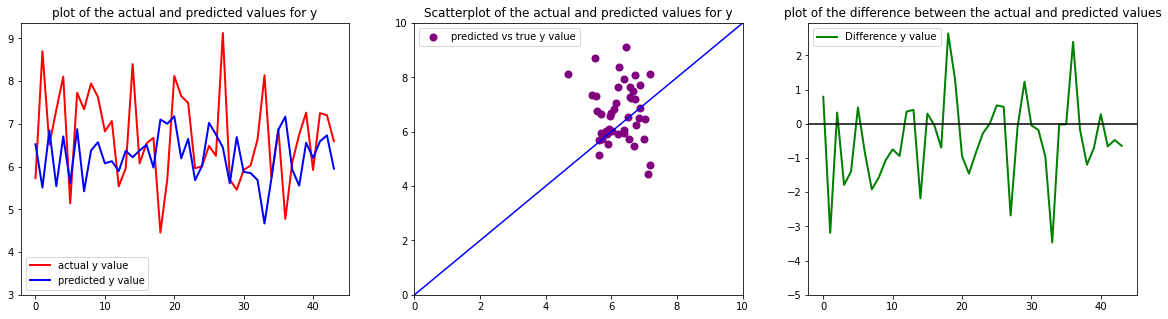

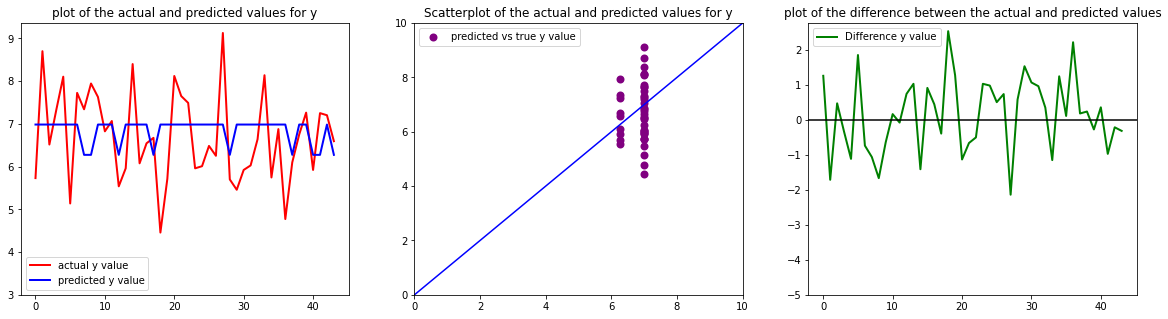

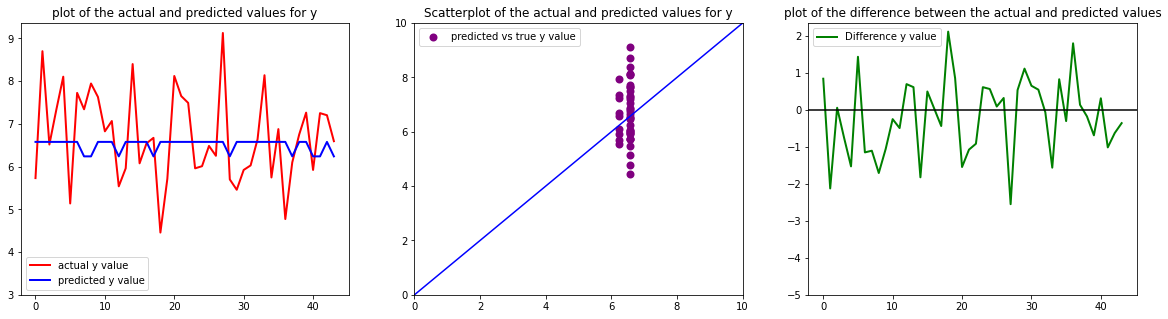

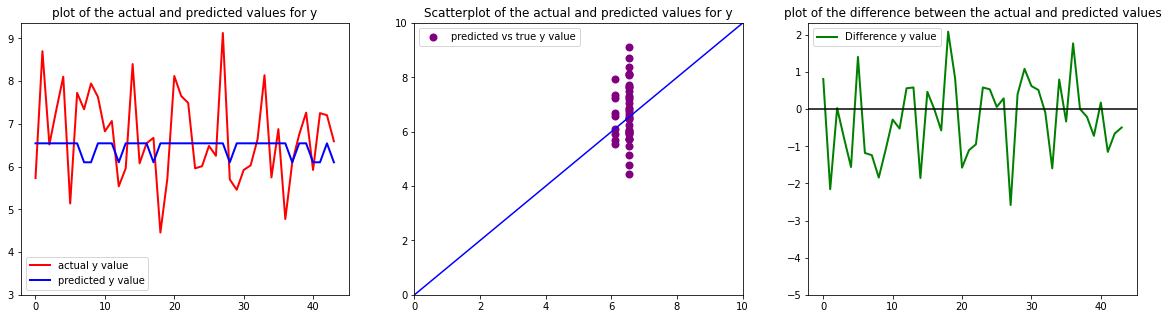

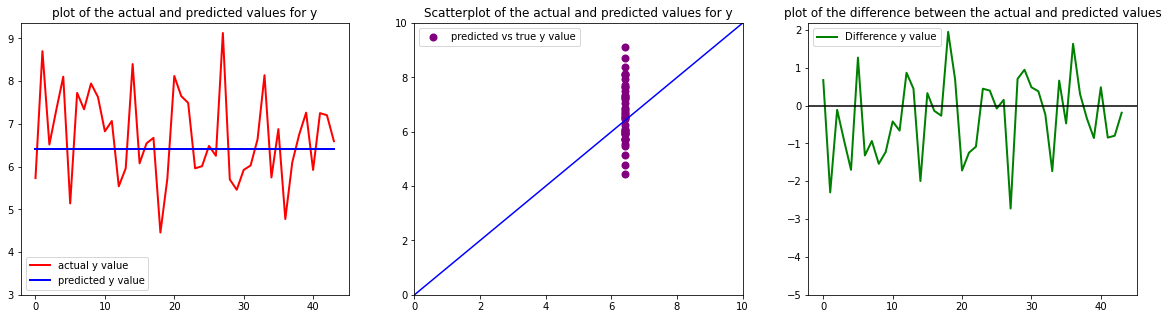

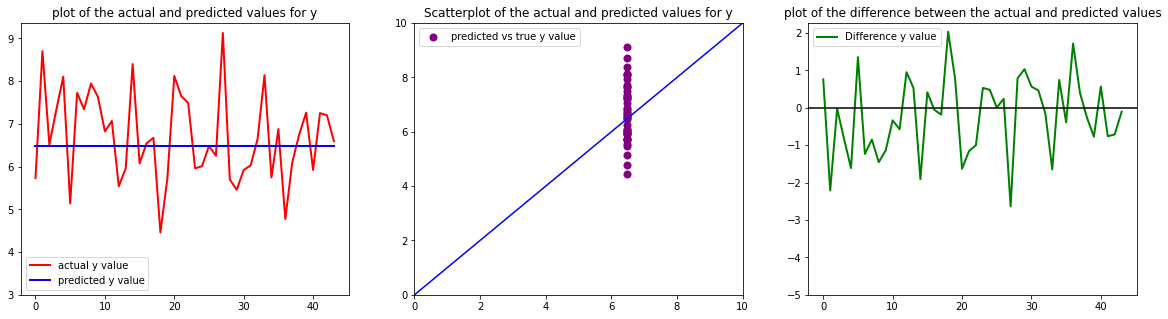

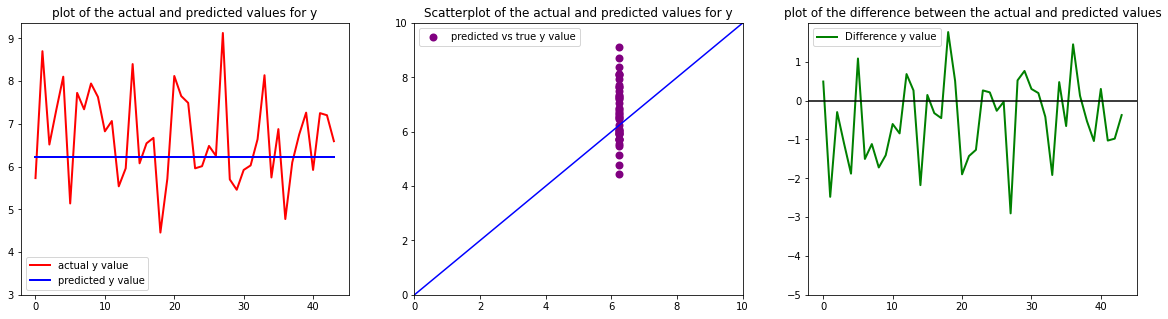

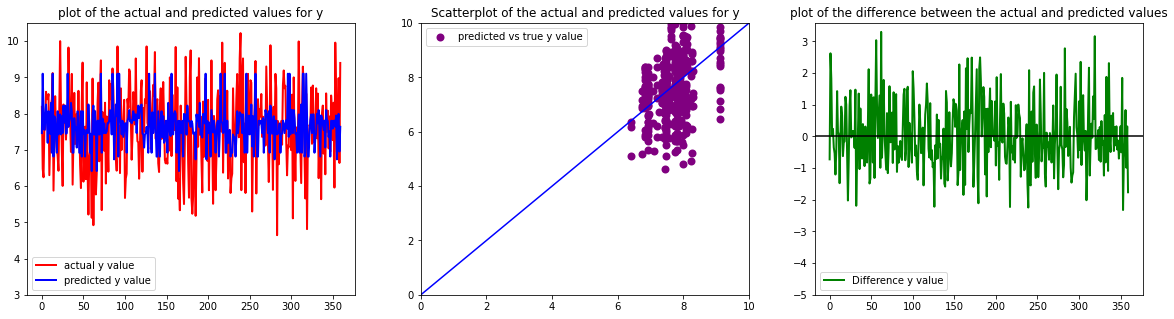

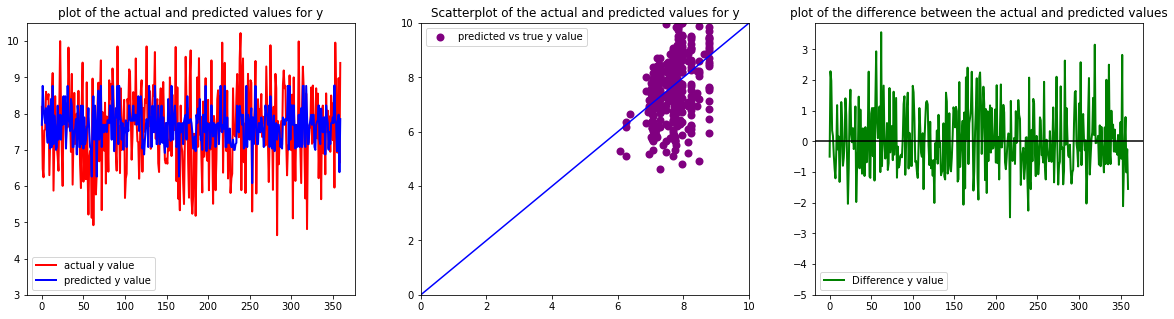

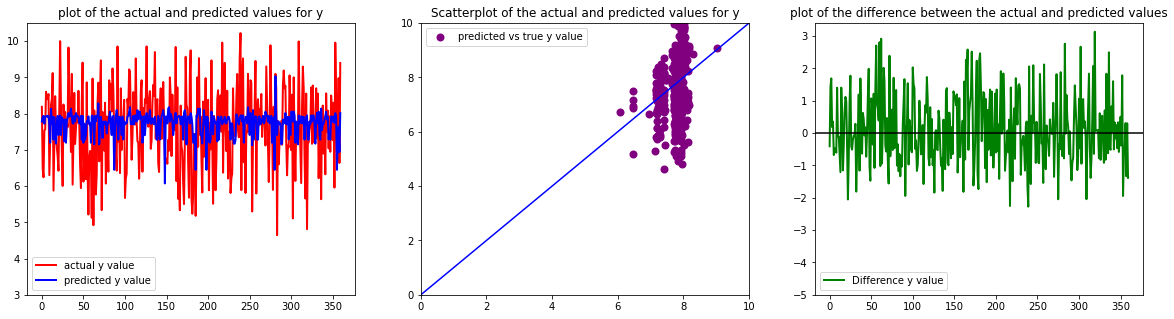

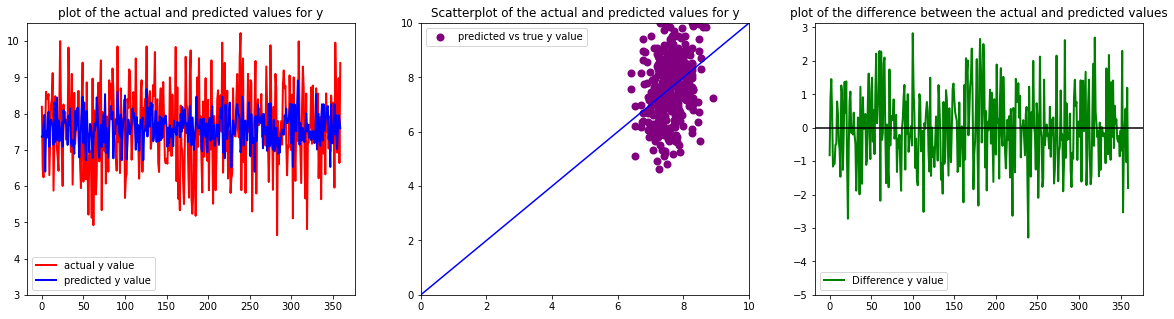

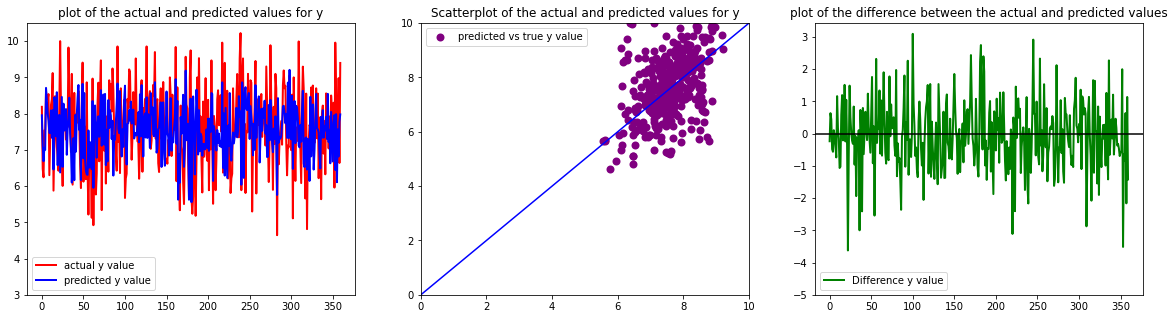

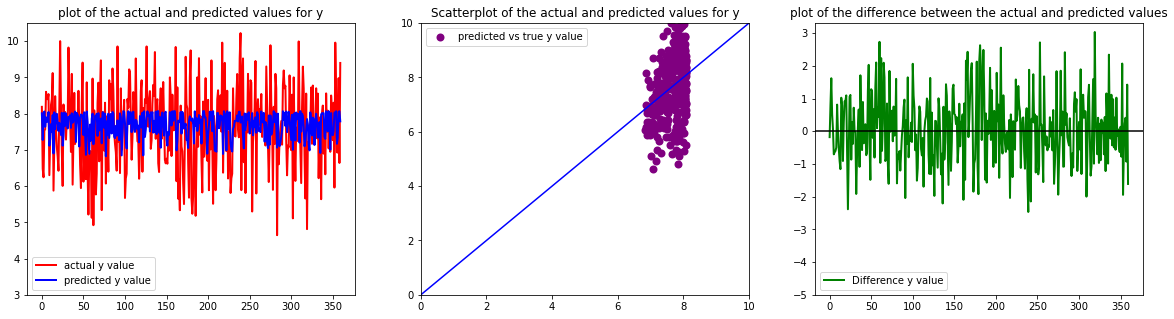

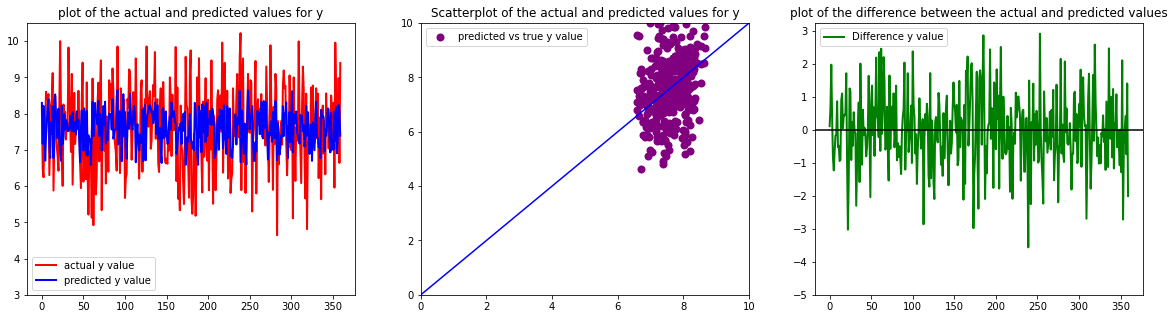

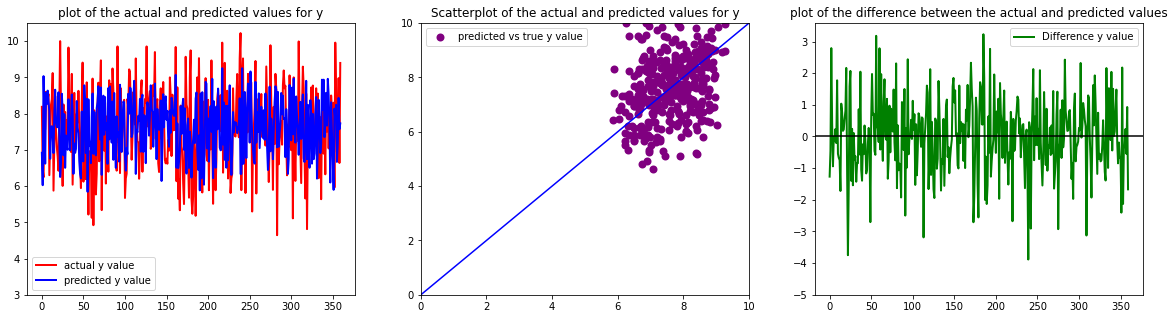

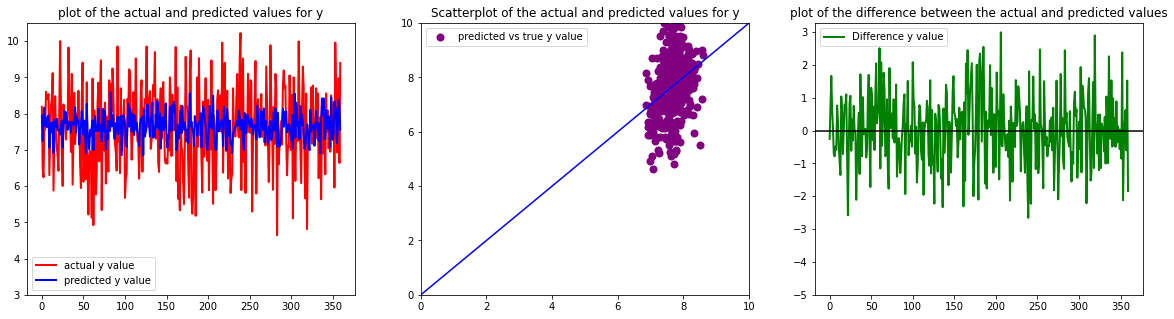

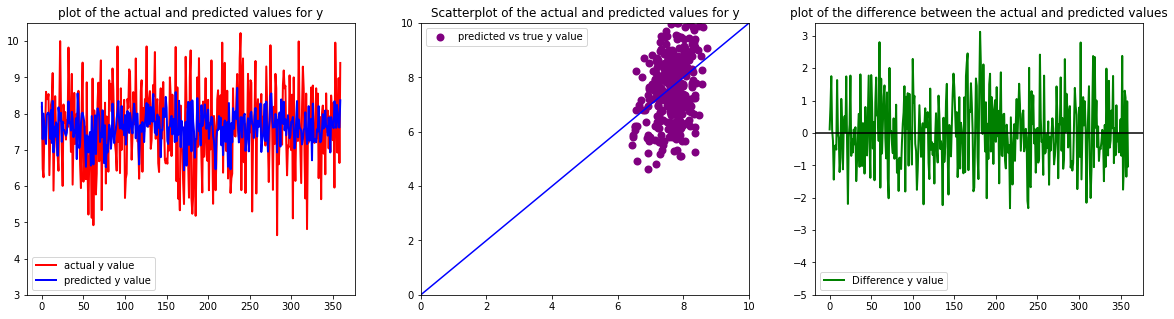

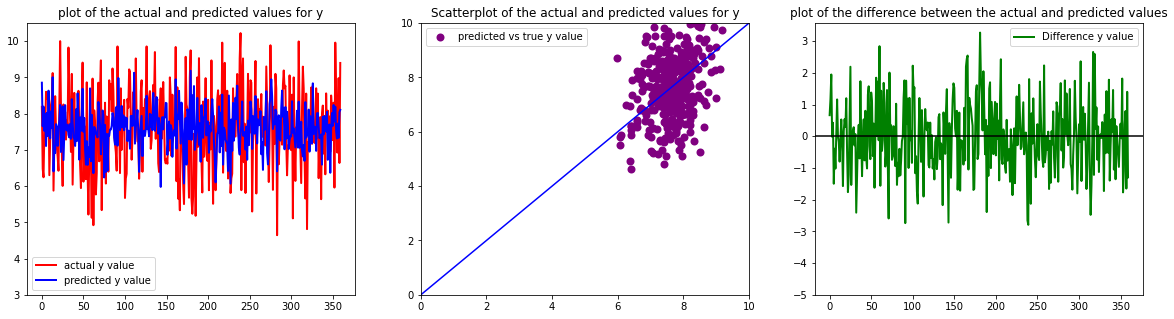

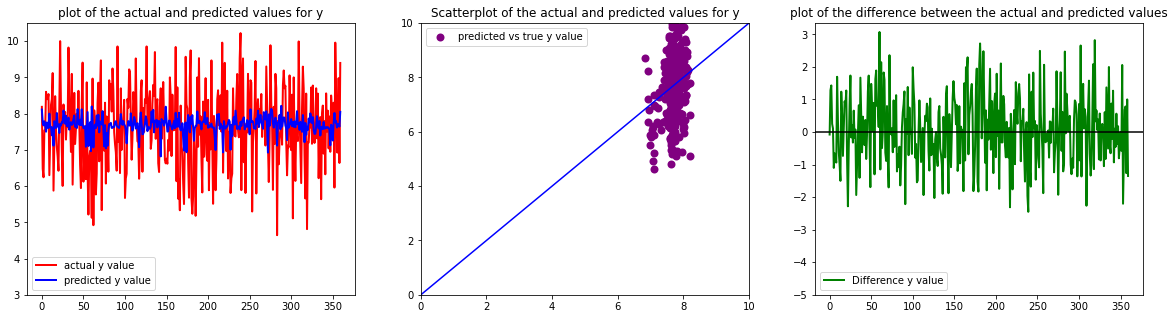

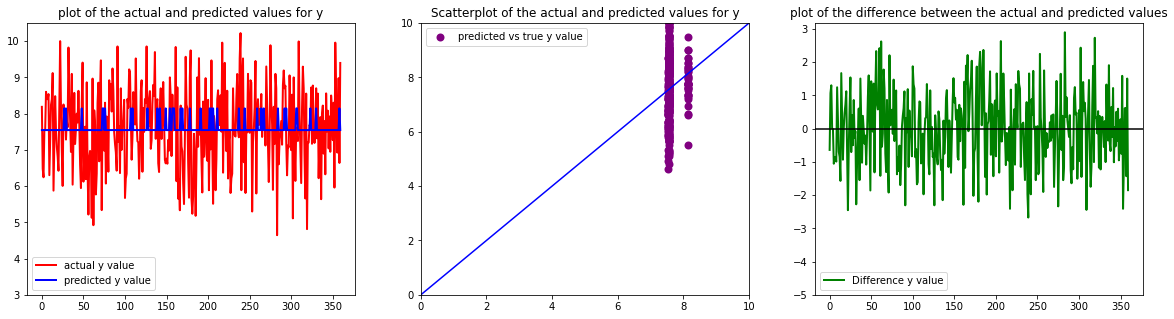

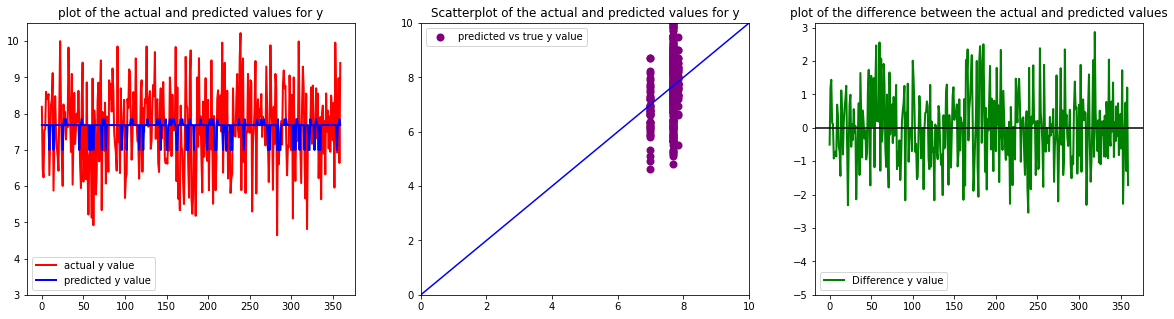

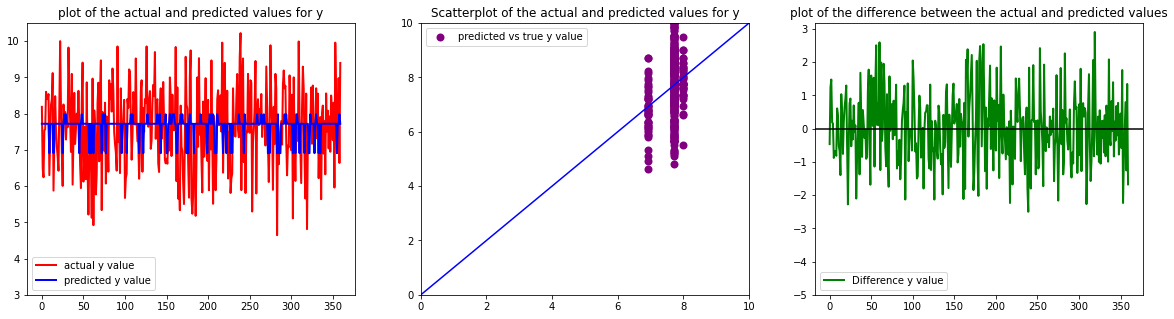

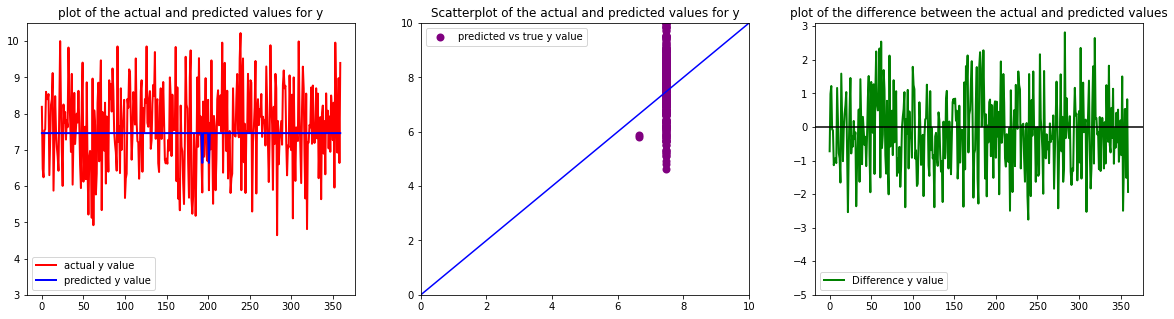

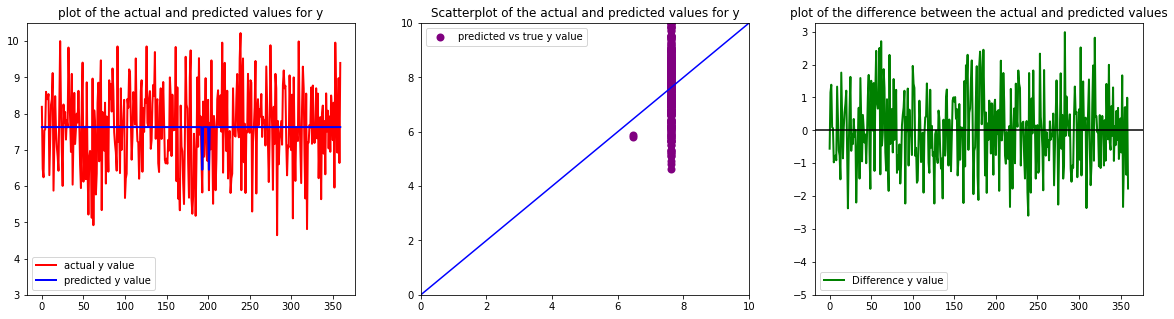

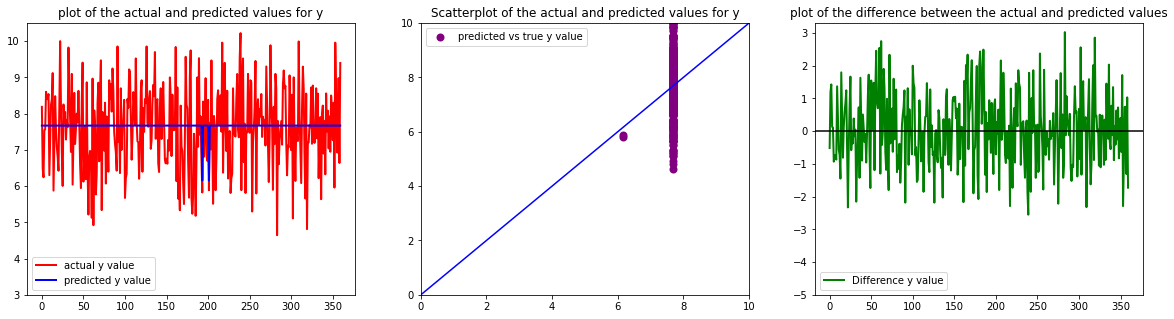

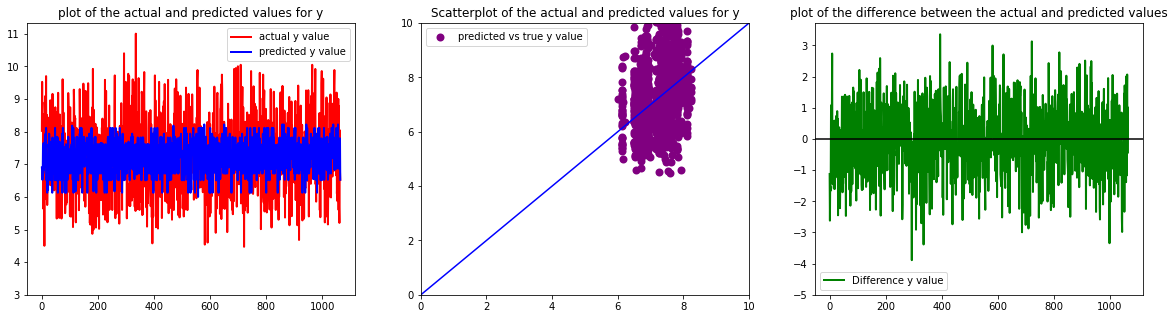

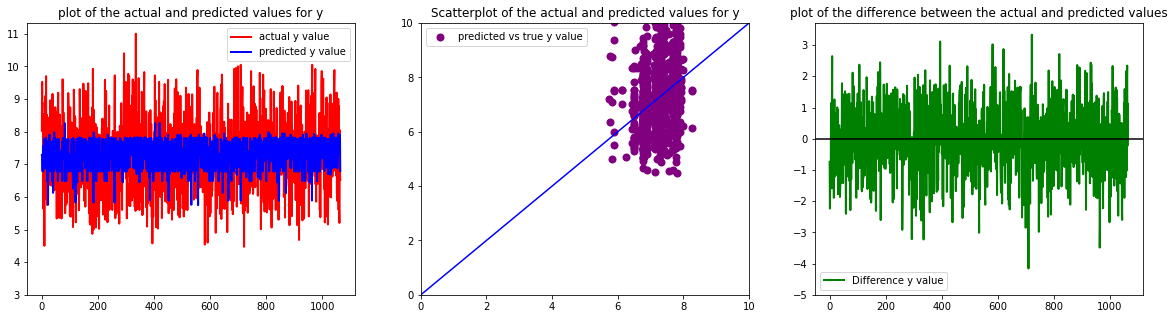

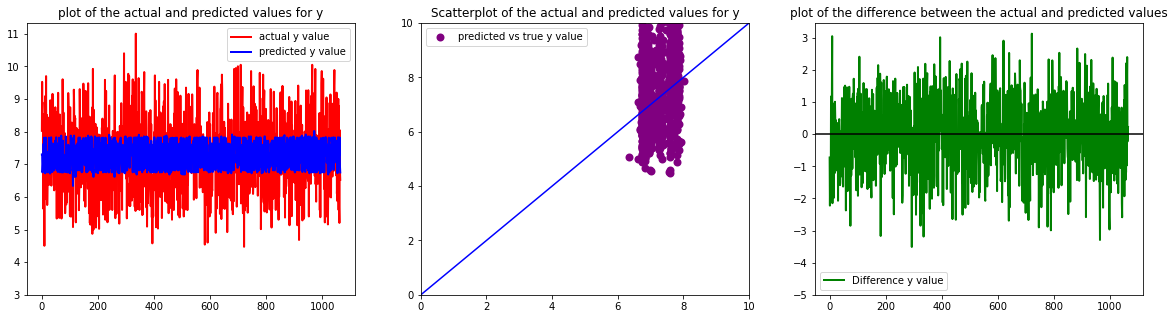

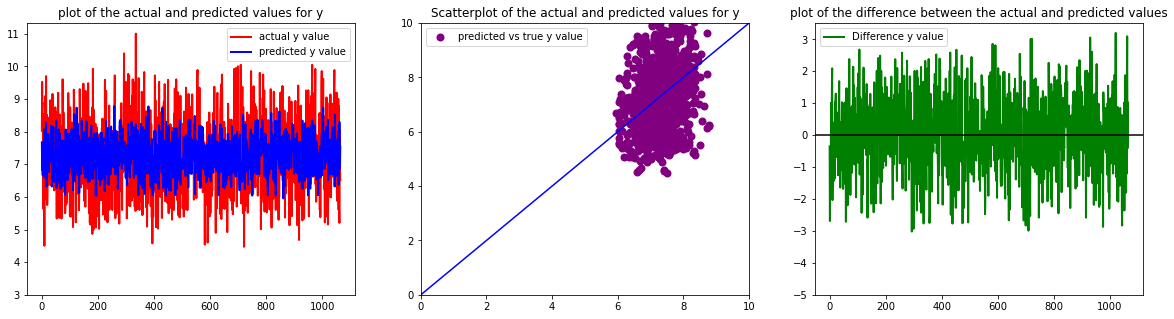

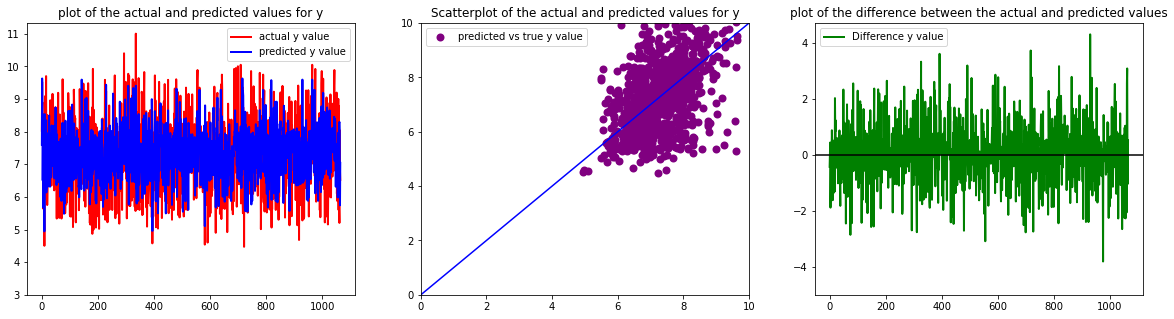

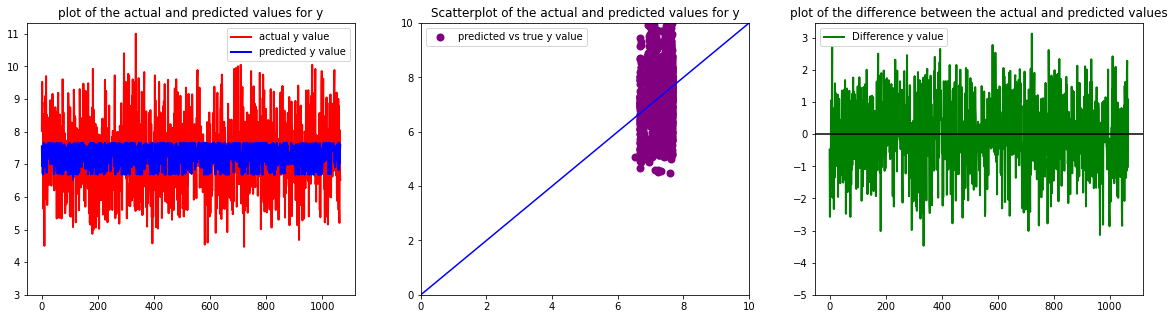

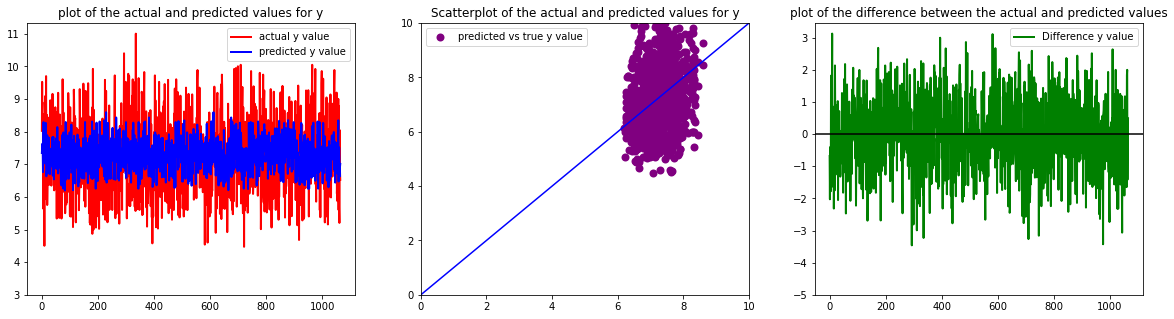

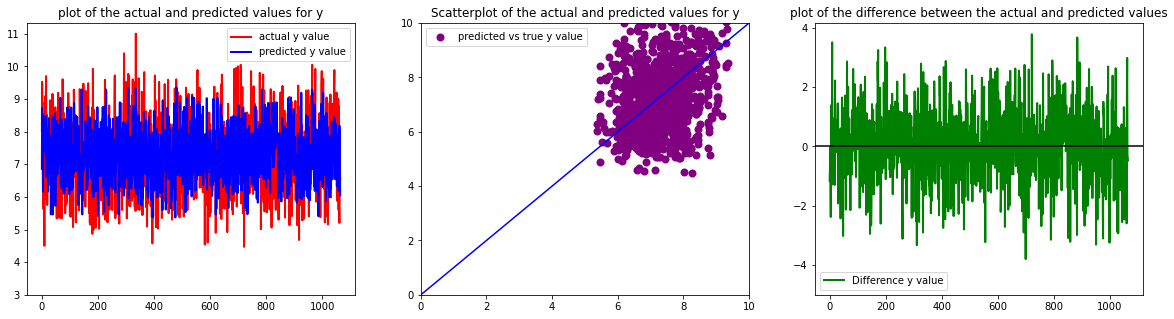

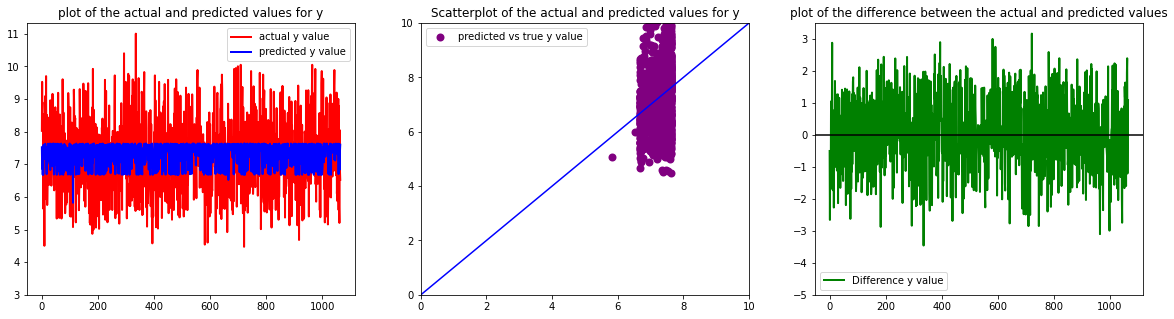

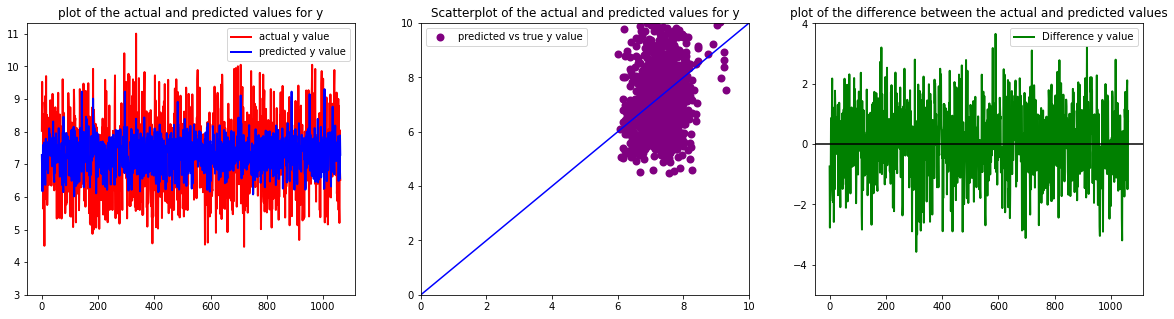

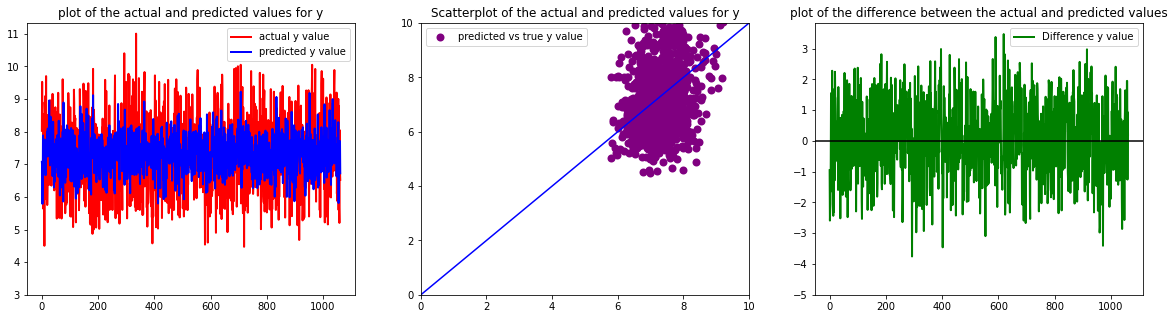

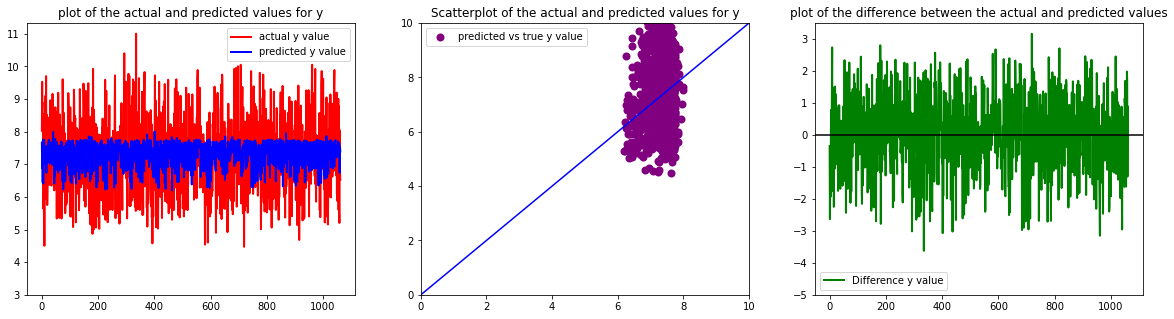

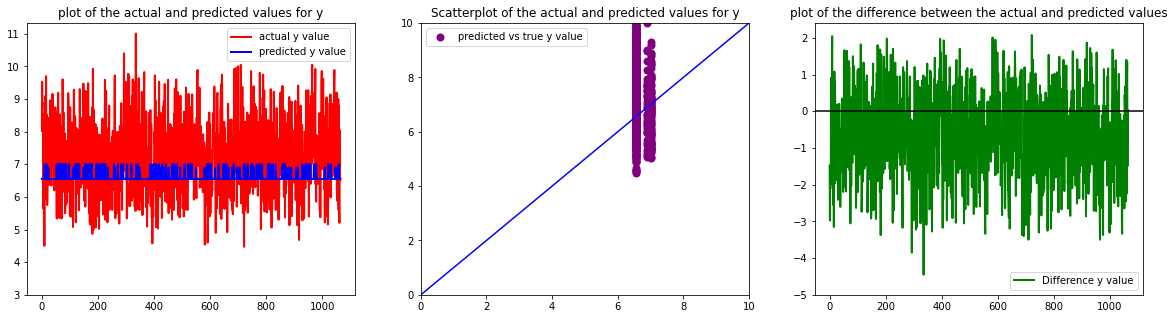

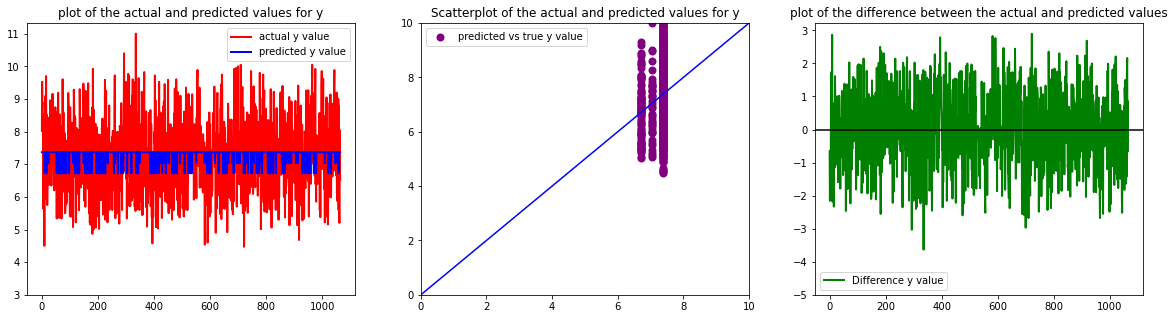

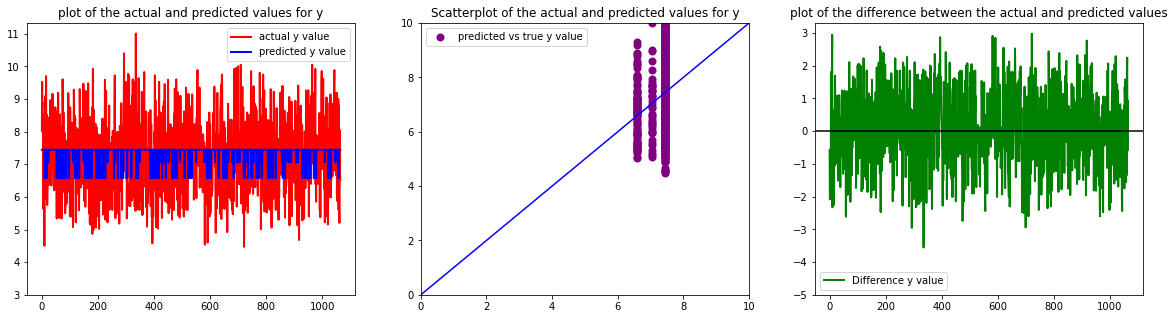

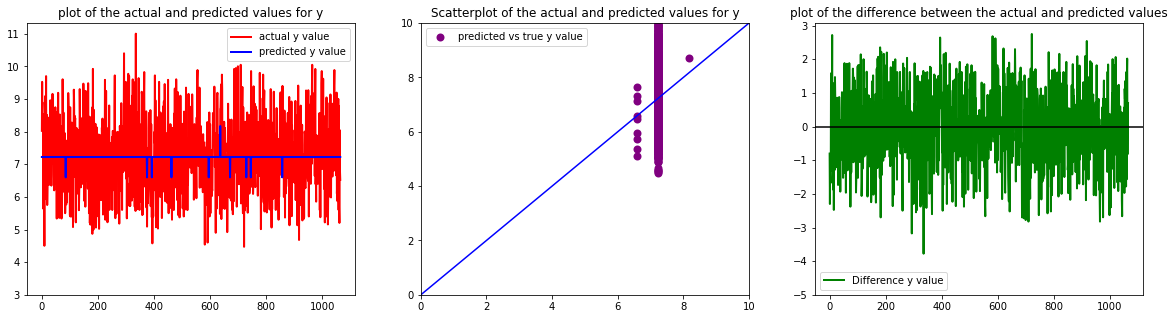

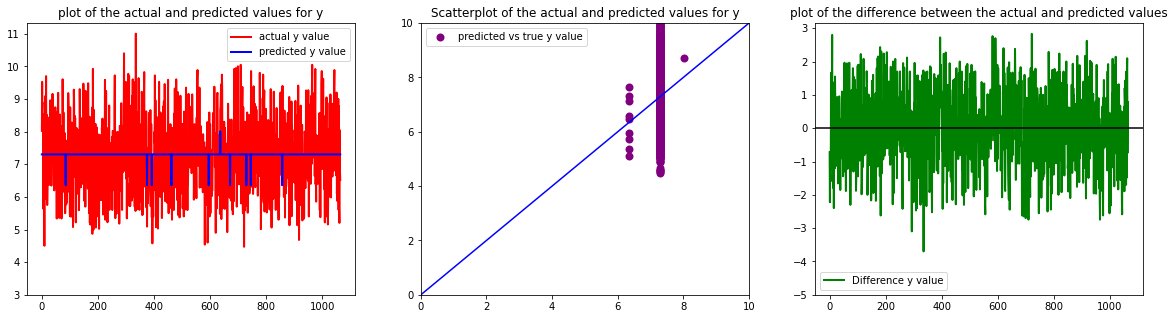

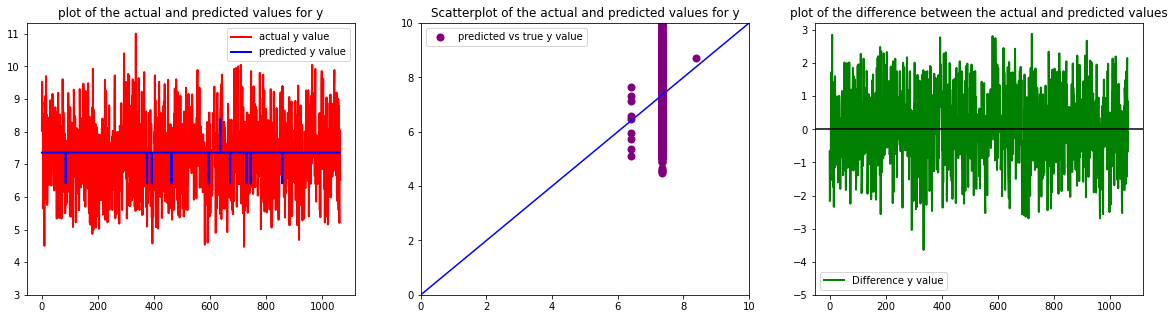

In [12]:
# Parameters
chems = [239, 4005, 224, 244] #, 4005, 224, 244
descriptors = ['CATS', 'CDKmolprop', 'constitutional', 'WHIM', 'Druglike', 'MorganFP'] 
models = ['knn', 'rf', 'svr']

# For loop that runs all models on all files
for chem in tqdm(chems):
    print(chem)
    for descriptor in descriptors:
        print(descriptor)
        train_data = pd.read_csv(f'../descriptors_data/CHEMBL{chem}_train_{descriptor}.csv')
        test_data = pd.read_csv(f'../descriptors_data/CHEMBL{chem}_test_{descriptor}.csv')
        
        # Get x and y values
        y_train = train_data.loc[:, 'Y'].values.astype(np.float)
        y_test = test_data.loc[:, 'Y'].values.astype(np.float)
        X_train = train_data.iloc[:, [3,-1]].values.astype(np.float)
        X_test = test_data.iloc[:, [3,-1]].values.astype(np.float)
            
        # Scaling the x-values of the training and testing set
        #X_train = pd.DataFrame((X_train - X_train.mean(axis=0))/(X_train.std(axis=0)))
        #X_test = pd.DataFrame((X_test - X_test.mean(axis=0))/(X_test.std(axis=0)))

        training_dataset = X_train, y_train
        testing_dataset = X_test, y_test
        
        for model in models:
            print(model)
            model_selection(model, training_dataset, testing_dataset, chem, descriptor)

# Models

In [2]:
# K - Nearest Neighbors Model
def KNN_model(train_data, chem, descriptor, test_data, distance_type="euclidean"):
    
    # Create training and testing data
    x_train, y_train = train_data
    x_test, y_test = test_data
    
    # Lists for the visualize function
    list_y_pred = []
    list_y_actual = []
    list_y_diff = []
    
    # Metrics for all number of neighbors
    metrics_KNN_all = []
    
    # Set the parameters to check with GridSearch
    #TODO increase neighbors to 12 or 15
    param = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

    # GridSearch on KNN
    knn_model = GridSearchCV(KNeighborsRegressor(), param, cv=5, n_jobs=-1, verbose=0).fit(X_train, y_train)
    
    # Store the best n_neighbors parameter
    best_param = knn_model.best_params_['n_neighbors']
    
    # Print the best n_neighbors parameter
    print('The best value for the n_neighbors parameter in the KNN model is:', best_param)
    
    #Make KNN with best n_neighbors parameter
    best_knn_model = KNeighborsRegressor(n_neighbors=best_param, n_jobs=-1, metric=distance_type).fit(X_train, y_train)

    # Make prediction
    y_pred_knn=best_knn_model.predict(X_test)
        
    # Compute the metrics and store it in the total list of metrics
    metrics_KNN = compute_metric(y_test, y_pred_knn, y_train)
            
    for item in y_pred_knn:
        list_y_pred.append(item)

    for item in y_test:
        list_y_actual.append(item)

    for index in range(0, len(y_test)):
        list_y_diff.append(list_y_pred[index] - list_y_actual[index])
    
    # Create plots of the data
    visualize('knn', chem, descriptor, list_y_actual, list_y_pred, list_y_diff)
        
    return metrics_KNN


# Support Vector Regression Model
def SVR_model(train_data, chem, descriptor, test_data):
    
    # Create training and testing data
    x_train, y_train = train_data
    x_test, y_test = test_data
    
    # Set the parameters to check with GridSearch
    param = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

    # GridSearch on SVR
    svr_model = GridSearchCV(SVR(), param, cv=5, n_jobs=-1, verbose=0).fit(X_train, y_train)
    
    # Store the best kernel parameter
    best_param = svr_model.best_params_['kernel']
    
    # Print the best kernel parameter
    print('The best value for the kernel parameter in the SVR model is:', best_param)

    # Make SVR with best kernel parameter
    best_svr_model = SVR(kernel = best_param).fit(X_train, y_train)

    #Mmake prediction
    y_pred_svr = best_svr_model.predict(X_test)
    
    metrics_SVR = compute_metric(y_test, y_pred_svr, y_train)

    list_y_pred = []
    list_y_actual = []
    list_y_diff = []
    
    for item in y_pred_svr:
        list_y_pred.append(item)

    for item in y_test:
        list_y_actual.append(item)

    for index in range(0, len(y_test)):
        list_y_diff.append(list_y_pred[index] - list_y_actual[index])
        
    # Create plots of the data
    visualize('svr', chem, descriptor, list_y_actual, list_y_pred, list_y_diff)
        
    return metrics_SVR

    
# Random Forest model 
def RF_model(train_data, chem, descriptor, test_data):
    
    # Create training and testing data
    x_train, y_train = train_data
    x_test, y_test = test_data
    
    # Lists for the visualize function
    list_y_pred = []
    list_y_actual = []
    list_y_diff = []
    
    # Set the parameters to check with GridSearch
    param = {'n_estimators': [50, 100, 500, 1000]}

    # GridSearch on RandomForestRegressor
    rf_model = GridSearchCV(RandomForestRegressor(), param, cv=5, return_train_score=True, n_jobs=-1, verbose=0).fit(X_train,y_train)
    
    # Store the best n_estimator parameter
    best_param = rf_model.best_params_['n_estimators']
    
    # Print the best n_estimator parameter
    print('The best value for the n_estimator parameter in the RF model is:', best_param)

    # Make randomforest with best value for n_estimator
    best_rf_model = RandomForestRegressor(n_estimators = best_param).fit(X_train,y_train)

    # Make prediction
    y_pred_rf=best_rf_model.predict(X_test)

    # Compute regression metrics
    metrics_RF = compute_metric(y_test, y_pred_rf, y_train)
    
    for item in y_pred_rf:
        list_y_pred.append(item)

    for item in y_test:
        list_y_actual.append(item)

    for index in range(0, len(y_test)):
        list_y_diff.append(list_y_pred[index] - list_y_actual[index])
    
    # Create plots of the data
    visualize('rf', chem, descriptor, list_y_actual, list_y_pred, list_y_diff)
        
    return metrics_RF

# Metrics

In [3]:
# Compute the RMSEP metric
def RMSEP(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
#     rmsep = np.sqrt(np.mean(np.square(((y_true - y_pred))), axis=0))
    
    rmsep = np.sqrt(np.sum(np.square(y_true - y_pred))/len(y_test))

    return rmsep

    #Q2F3
    #Q2F3 = 1 - np.sqrt(np.mean(np.square(((y_true - y_pred))) / (np.sqrt(np.mean(np.square(((y_true - y_pred))))
    
def Q_square(y_true, y_pred, y_train):
    '''
    Compute Q square metric.
    '''
    
    q_square = 1 - (np.sum(np.square(y_true-y_pred))/len(y_test))/(np.sum(np.square(y_true-y_train.mean()))/len(y_train))
    
    return q_square
    

# Compute all metrics
def compute_metric(y_test, y_pred, y_train):
    
    # Make lists for metrics
    #mean_squared_error_score = []
    #variance_score = []
    #max_error_score = []
    r2_value = []
    rmsep = []
    q2 = []
    
    # Compute regression metrics
    #mean_squared_error_score.append(mean_squared_error(y_test, y_pred))
    #variance_score.append(explained_variance_score(y_test, y_pred))
    #max_error_score.append(max_error(y_test, y_pred))
    r2_value.append(r2_score(y_test, y_pred))
    rmsep.append(RMSEP(y_test, y_pred))
    q2.append(Q_square(y_test, y_pred, y_train))
    
    return r2_value, rmsep, q2 #mean_squared_error_score, variance_score, max_error_score, 

def save_metrics(variables, model, chem, descriptor):
    # print(f'Save the {model} model metrics to disk!')
    output = [model, chem, descriptor]
    
    for i in range(len(variables)):
        output.append(variables[i])
    
    # Create a pandas dataframe of variables and transpose it
    DF = pd.DataFrame(output).T
    
    # Custom column names
    column_names = ['model', 'chem', 'descriptor', 'r2_value', 'rmsep', 'q2'] #'mean_squared_error_score', 'variance_score', 'max_error_score', 
    
    # Store the variables as CSV to disk with custom column names
    DF.to_csv(f"variables/{model}_{chem}_{descriptor}_variables.csv", header=column_names, index=None)

# Model Selection

In [4]:
# Model selection function
def model_selection(model, training_dataset, testing_dataset, chem=None, descriptor=None):
    if model == 'knn':
        variables = KNN_model(training_dataset, chem, descriptor, testing_dataset)
        save_metrics(variables, model, chem, descriptor)
        
    elif model == 'rf':
        variables = RF_model(training_dataset, chem, descriptor, testing_dataset)
        save_metrics(variables, model, chem, descriptor)
        
    elif model == 'svr':
        variables = SVR_model(training_dataset, chem, descriptor, testing_dataset)
        save_metrics(variables, model, chem, descriptor)
        
    else:
        print('Error! This is not a valid model name. Select knn, rf or svr.')
    return

# Visualization

In [5]:
# Visualize data
def visualize(model, chem, descriptor, y_actual, y_pred, y_diff):
    
    # Make plots
    fig, axes = plt.subplots(1, 3,  figsize=(20, 5))
    axes[0].plot(y_actual, lw=2, color="red", label="actual y value")
    axes[0].set_ylim(ymin=3)
    axes[0].plot(y_pred, lw=2, color="blue", label="predicted y value")
    axes[0].legend()
    axes[0].set_title('plot of the actual and predicted values for y')

    axes[1].scatter(y_pred,y_actual, lw=2, color="purple", label="predicted vs true y value")
    axes[1].set_ylim(ymin=0, ymax=10)
    axes[1].set_xlim(xmin=0, xmax=10)
    axes[1].plot([0, 1], [0, 1], transform=axes[1].transAxes, color="blue")
    axes[1].legend()
    axes[1].set_title('Scatterplot of the actual and predicted values for y')

    axes[2].plot(y_diff, lw=2, color="green", label="Difference y value")
    axes[2].set_ylim(ymin=-5)
    axes[2].axhline(y=0, color='black')
    axes[2].legend()
    axes[2].set_title('plot of the difference between the actual and predicted values')
    
    fig.savefig(f'images/{model}_{chem}_{descriptor}.png')

# Model selection

Run a specific model on a specific training and testing set. The chem and descriptor parameters can be null.

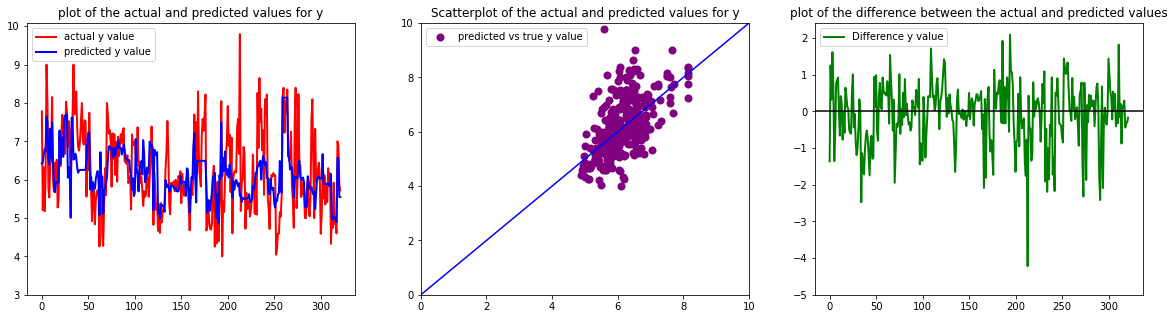

In [18]:
# Select knn, rf or svr
model_selection('knn', training_dataset, testing_dataset)